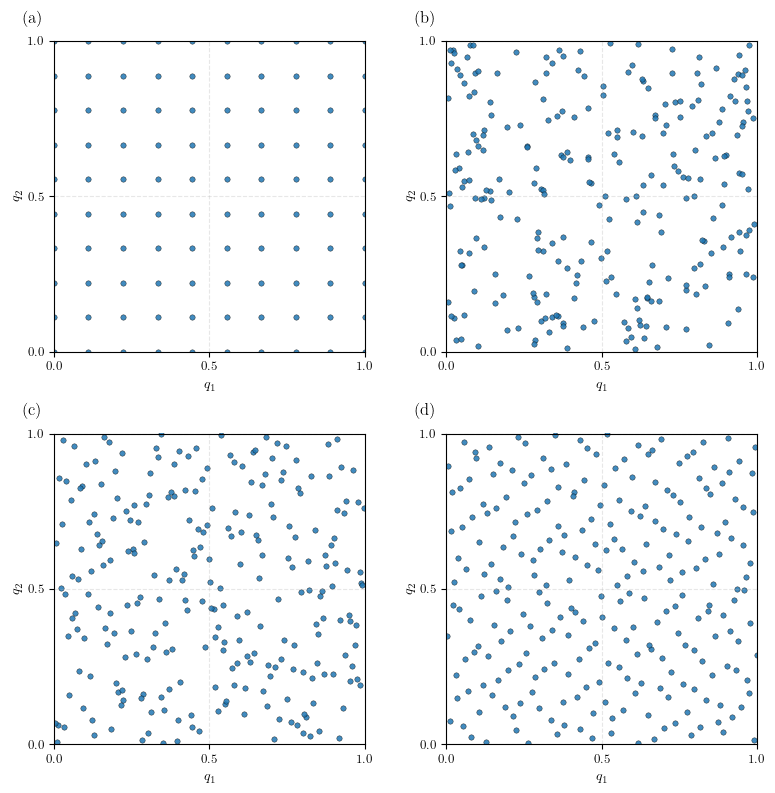

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
from matplotlib import rcParams

from gpr_modelling.forward.config import EXPERIMENTAL_DESIGN_DIR

# LaTeX rendering and font setup
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 10,
    "axes.titlesize": 12,
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
})

np.random.seed(42)

# (a) Regular Grid
grid_size = int(np.sqrt(100))
x = np.linspace(0, 1, grid_size)
X_grid, Y_grid = np.meshgrid(x, x)
grid_points = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

# (b) Uniform Random Sampling
uniform_points = np.random.uniform(0, 1, size=(256, 2))

# (c) Latin Hypercube Sampling
lhs_sampler = qmc.LatinHypercube(d=2)
lhs_points = lhs_sampler.random(n=256)

# (d) Sobol Sequence
sobol_sampler = qmc.Sobol(d=2, scramble=True)
sobol_points = sobol_sampler.random(n=256)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
points_list = [grid_points, uniform_points, lhs_points, sobol_points]
labels = ["(a)", "(b)", "(c)", "(d)"]

for ax, points, label in zip(axes.flatten(), points_list, labels):
    ax.scatter(points[:, 0], points[:, 1], s=15, alpha=0.85, edgecolors='black', linewidth=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([0.0, 0.5, 1.0])
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_xlabel(r"$q_1$")
    ax.set_ylabel(r"$q_2$")
    ax.set_aspect('equal')
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.text(-0.1, 1.1, label, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.savefig(EXPERIMENTAL_DESIGN_DIR / "training_designs.pdf", dpi=300, bbox_inches='tight')
plt.show()

